In [1]:
#import necessary Library
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
# Set up visualizations
sn.set(style="whitegrid")

In [2]:
#load Dataset
#df = pd.read_csv(".data/sierraleone-bumbuna.csv")
df = pd.read_csv("../data/togo-dapaong_qc.csv")
df.head()

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1  2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2  2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3  2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4  2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.4  227.6      1.1  977         0            0.0   24.7   24.4   
1      0.4  229.3      0.7  977         0            0.0   24.7   24.4   
2      0.3  228.5      2.9  977         0            0.0   24.7   24.4   
3      0.3  229.1      4.6  977         0            0.0   24.7   24.4   
4      0.4  227.5      1.6  977         0            0.0   24.7   24.4   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

1. Summary Statistics

Calculate the mean, median, standard deviation, and other statistical measures for each numeric column to understand the data distribution.

In [3]:
# Calculate summary statistics
df.describe()


GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         0.000000      24.200000      26.500000       1.400000   
50%         4.300000      27.200000      59.300000       2.200000   
75%       411.000000      31.100000      80.800000       3.200000   
max      1367.000000      41.400000      99.800000      16.100000   

              WSgust        WSstdev             WD        WDstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        3.229490       0.557740     161.741845      10.559568   
std         1.882565       0.268923      91.877217       5.915490   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.900000       0.400000      74.800000       6.900000   
50%         2.900000       0.500000     199.100000      10.800000   
75%         4.400000       0.700000     233.500000      14.100000   
max        23.100000       4.700000     360.000000      86.900000   

                  BP       Cleaning  Precipitation          TModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      975.915242       0.000535       0.001382      32.444403   
std         2.153977       0.023116       0.026350      10.998334   
min       968.000000       0.000000       0.000000      13.100000   
25%       975.000000       0.000000       0.000000      23.900000   
50%       976.000000       0.000000       0.000000      28.400000   
75%       977.000000       0.000000       0.000000      40.600000   
max       983.000000       1.000000       2.300000      70.400000   

               TModB  Comments  
count  525600.000000       0.0  
mean       33.543330       NaN  
std        12.769277       NaN  
min        13.100000       NaN  
25%        23.600000       NaN  
50%        28.400000       NaN  
75%        43.000000       NaN  
max        94.600000       NaN

The output includes mean, median, standard deviation, min, max, and quartiles for each numeric column as shown in the above

2. Data Quality Check

 Look for missing values, outliers, or incorrect entries.

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


from the above we can see that all the column except Comments have free from Both Null and NAN values. However the Comments Attrbute have 525600 NAN values. Hence this column is not important for the analysis therefore we need to drop it to get better results.

In [5]:
#Dealing missing missing_values
df = df.drop(['Comments'], axis=True)
df.head()

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1  2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2  2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3  2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4  2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  
0      0.4  227.6      1.1  977         0            0.0   24.7   24.4  
1      0.4  229.3      0.7  977         0            0.0   24.7   24.4  
2      0.3  228.5      2.9  977         0            0.0   24.7   24.4  
3      0.3  229.1      4.6  977         0            0.0   24.7   24.4  
4      0.4  227.5      1.6  977         0            0.0   24.7   24.4

In [6]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
dtype: int64


Now our data is free from missing and NaN values.

In [7]:
# Check for incorrect entries like negative values where only positives should exist
ghi_negative = df[df['GHI'] < 0]
dni_negative = df[df['DNI'] < 0]
dhi_negative = df[df['DHI'] < 0]
print("Negative GHI Values:\n", ghi_negative)
print("Negative DNI Values:\n", dni_negative)
print("Negative DHI Values:\n", dhi_negative)

Negative GHI Values:
                Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0       2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1       2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2       2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3       2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4       2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   
...                  ...  ...  ...  ...   ...   ...   ...   ...  ...     ...   
525595  2022-10-24 23:56 -0.8  0.0  0.0   0.0   0.0  25.2  53.8  0.0     0.0   
525596  2022-10-24 23:57 -0.9  0.0  0.0   0.0   0.0  25.3  53.5  0.0     0.0   
525597  2022-10-24 23:58 -1.0  0.0  0.0   0.0   0.0  25.3  53.4  0.0     0.0   
525598  2022-10-24 23:59 -1.1  0.0  0.0   0.0   0.0  25.4  53.5  0.0     0.0   
525599  2022-10-25 00:00 -1.2  0.0  0.0   0.0   0.0  25.4  52.3  0.0     0.0   

        WSstdev  

In [8]:
# Replace negative values with 0
df['GHI'] = df['GHI'].apply(lambda x: max(x, 0))
df['DNI'] = df['DNI'].apply(lambda x: max(x, 0))
df['DHI'] = df['DHI'].apply(lambda x: max(x, 0))


In [9]:
# Check for incorrect entries like negative values where only positives should exist
ghi_negative = df[df['GHI'] < 0]
dni_negative = df[df['DNI'] < 0]
dhi_negative = df[df['DHI'] < 0]
print("Negative GHI Values:\n", ghi_negative)
print("Negative DNI Values:\n", dni_negative)
print("Negative DHI Values:\n", dhi_negative)

Negative GHI Values:
 Empty DataFrame
Columns: [Timestamp, GHI, DNI, DHI, ModA, ModB, Tamb, RH, WS, WSgust, WSstdev, WD, WDstdev, BP, Cleaning, Precipitation, TModA, TModB]
Index: []
Negative DNI Values:
 Empty DataFrame
Columns: [Timestamp, GHI, DNI, DHI, ModA, ModB, Tamb, RH, WS, WSgust, WSstdev, WD, WDstdev, BP, Cleaning, Precipitation, TModA, TModB]
Index: []
Negative DHI Values:
 Empty DataFrame
Columns: [Timestamp, GHI, DNI, DHI, ModA, ModB, Tamb, RH, WS, WSgust, WSstdev, WD, WDstdev, BP, Cleaning, Precipitation, TModA, TModB]
Index: []


In [10]:
# Check for outliers in sensor readings and wind speed
sensor_outliers = df[['ModA', 'ModB']].describe()
wind_outliers = df[['WS', 'WSgust']].describe()
print("Sensor Outliers:\n", sensor_outliers)
print("Wind Outliers:\n", wind_outliers)

Sensor Outliers:
                 ModA           ModB
count  525600.000000  525600.000000
mean      226.144375     219.568588
std       317.346938     307.932510
min         0.000000       0.000000
25%         0.000000       0.000000
50%         4.400000       4.300000
75%       422.525000     411.000000
max      1380.000000    1367.000000
Wind Outliers:
                   WS         WSgust
count  525600.000000  525600.000000
mean        2.368093       3.229490
std         1.462668       1.882565
min         0.000000       0.000000
25%         1.400000       1.900000
50%         2.200000       2.900000
75%         3.200000       4.400000
max        16.100000      23.100000


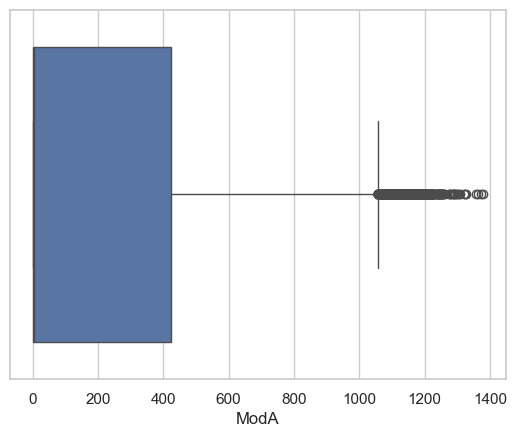

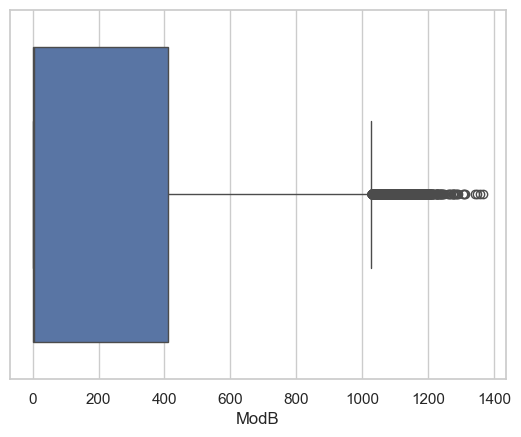

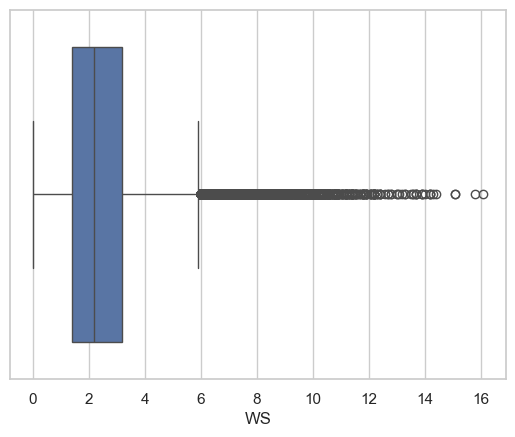

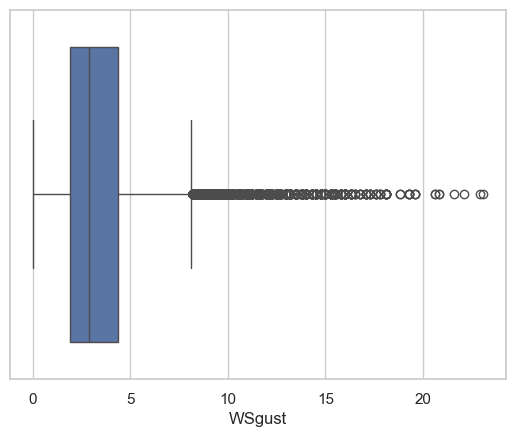

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['ModA'])
plt.show()

sns.boxplot(x=df['ModB'])
plt.show()

sns.boxplot(x=df['WS'])
plt.show()

sns.boxplot(x=df['WSgust'])
plt.show()


3. Time Series Analysis

Plot line graphs or area plots of GHI, DNI, DHI, and Tamb over time to observe patterns, trends, or anomalies.

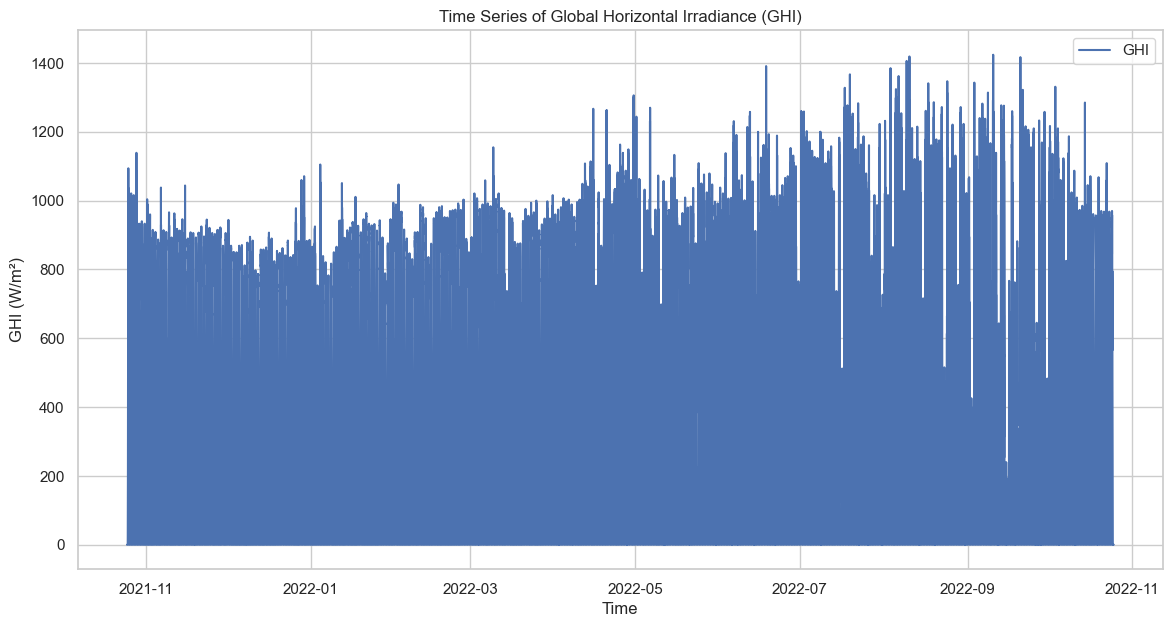

In [12]:
# Time series plot for GHI
# Convert 'Timestamp' to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
plt.figure(figsize=(14, 7))
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
plt.plot(df['Timestamp'], df['GHI'], label='GHI')
plt.xlabel('Time')
plt.ylabel('GHI (W/m²)')
plt.title('Time Series of Global Horizontal Irradiance (GHI)')
plt.legend()
plt.show()

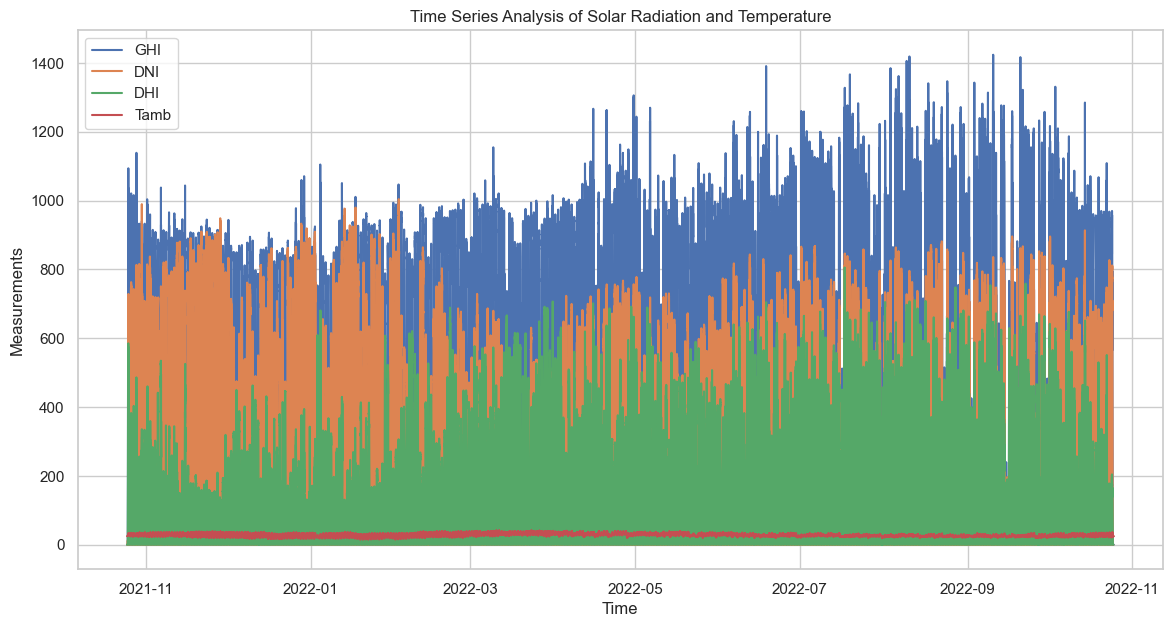

In [13]:
# Set 'Timestamp' as the index
df.set_index('Timestamp', inplace=True)

# Plot time series data
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['GHI'], label='GHI')
plt.plot(df.index, df['DNI'], label='DNI')
plt.plot(df.index, df['DHI'], label='DHI')
plt.plot(df.index, df['Tamb'], label='Tamb')
plt.xlabel('Time')
plt.ylabel('Measurements')
plt.title('Time Series Analysis of Solar Radiation and Temperature')
plt.legend()
plt.show()


4. Evaluate the Impact of Cleaning on Sensor Readings

Analyze the effect of cleaning events on sensor readings (ModA, ModB).

Impact of Cleaning on Sensor Readings:
                 ModA        ModB
Cleaning                        
0         225.979064  219.401351
1         535.186477  532.211744


<Figure size 1000x500 with 0 Axes>

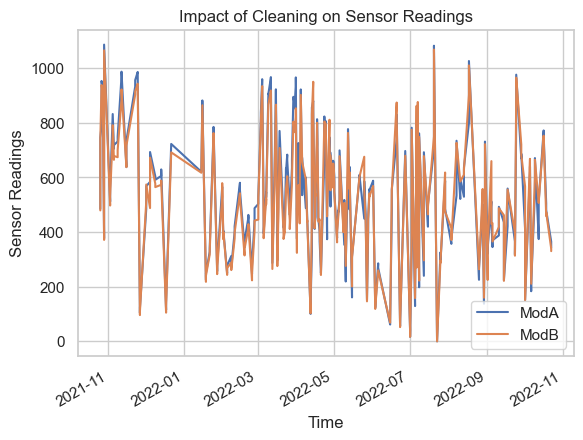

In [14]:
# Group by 'Cleaning' and calculate mean for 'ModA' and 'ModB'
cleaning_effect = df.groupby('Cleaning')[['ModA', 'ModB']].mean()
print("Impact of Cleaning on Sensor Readings:\n", cleaning_effect)

# Plot the impact
plt.figure(figsize=(10, 5))
df[df['Cleaning'] == 1][['ModA', 'ModB']].plot(kind='line', title='Impact of Cleaning on Sensor Readings')
plt.xlabel('Time')
plt.ylabel('Sensor Readings')
plt.show()


5. Correlation Analysis
Use heatmaps or pair plots to visualize correlations between solar radiation components and temperature measures.

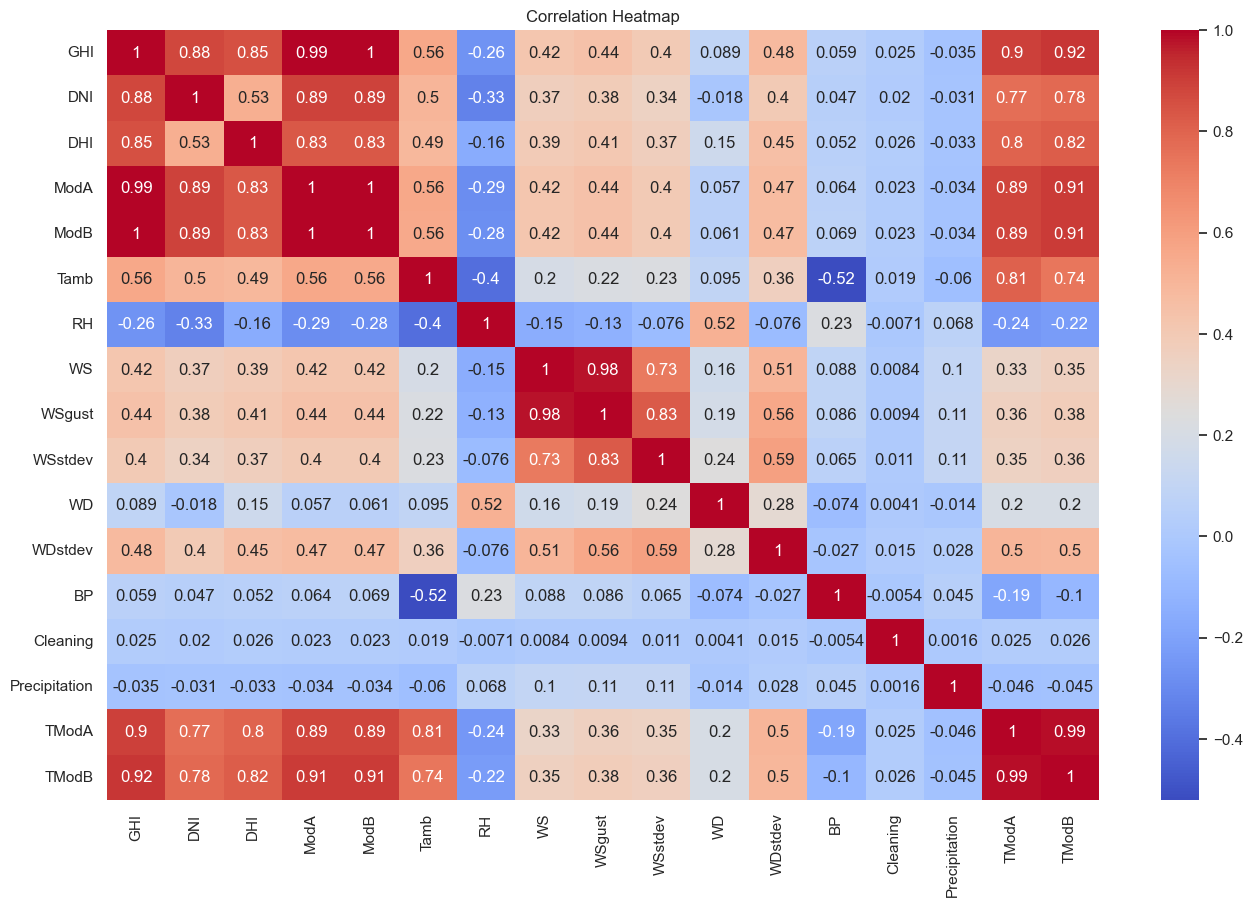

In [15]:
#Correlation Matrix and Heatmap: Calculate and visualize correlations using a heatmap.
corr_matrix = df.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


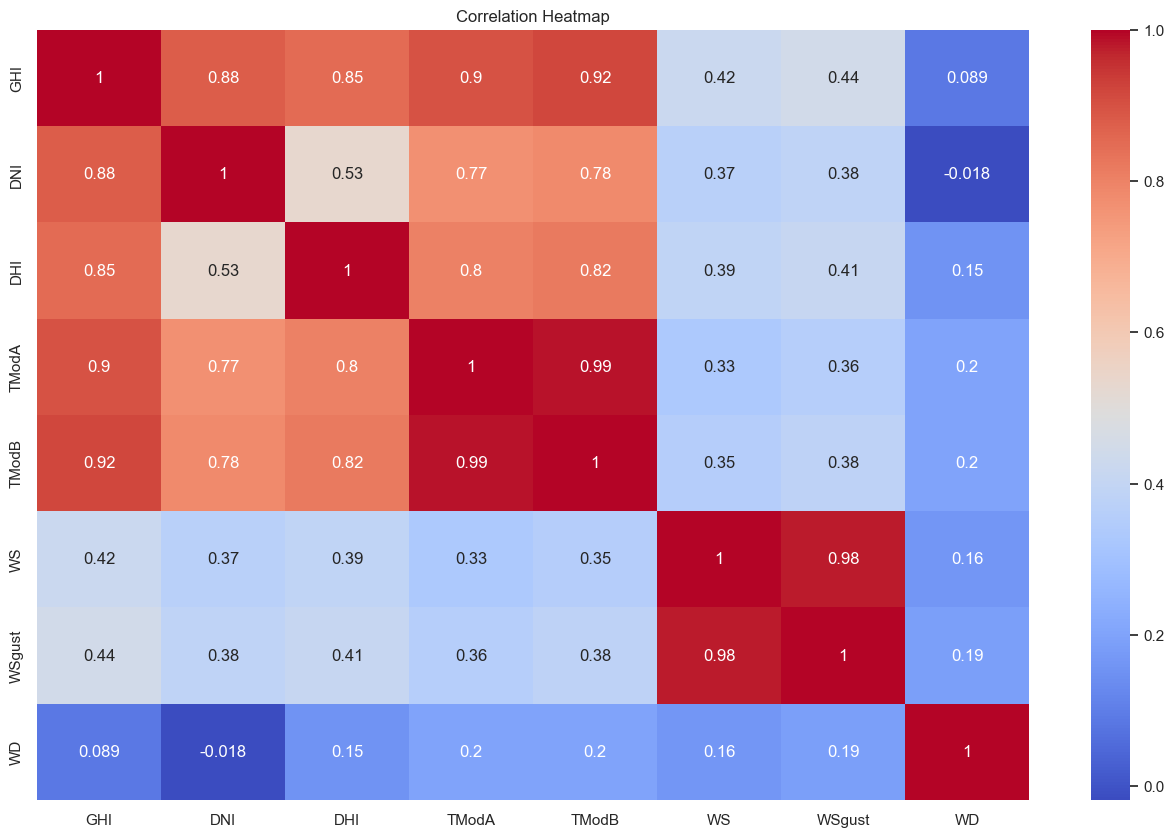

In [16]:
import seaborn as sns

# Compute the correlation matrix
corr_matrix = df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'WS', 'WSgust', 'WD']].corr()

# Plot heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


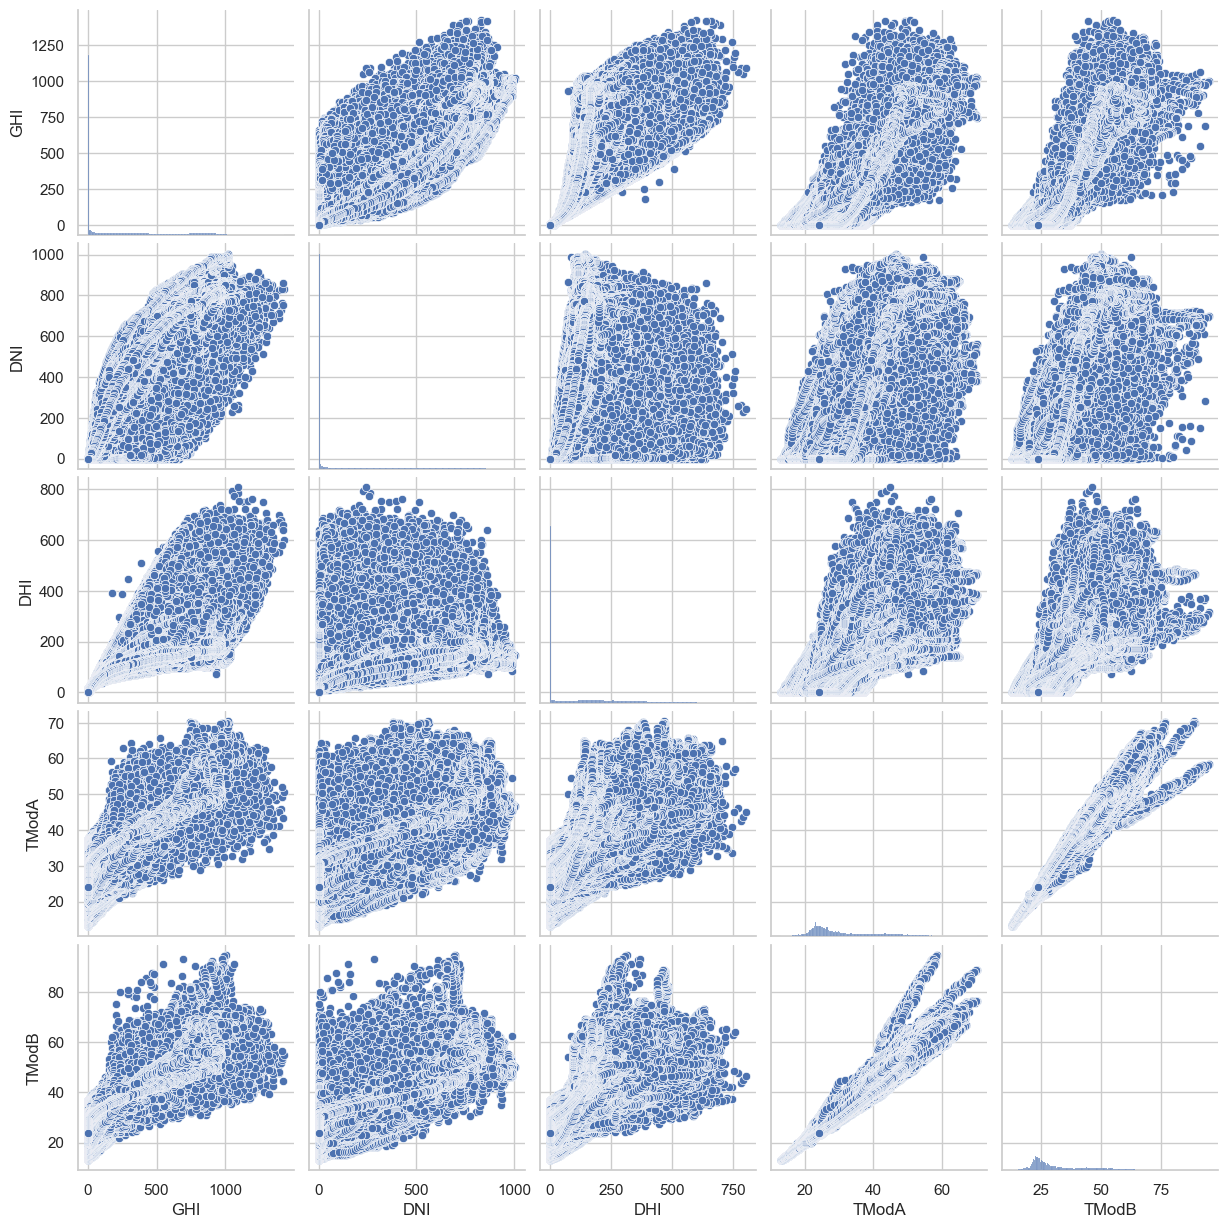

In [17]:
#Pair Plot: Use pair plots to visualize relationships between solar radiation components and temperature measures.
sns.pairplot(df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']])
plt.show()


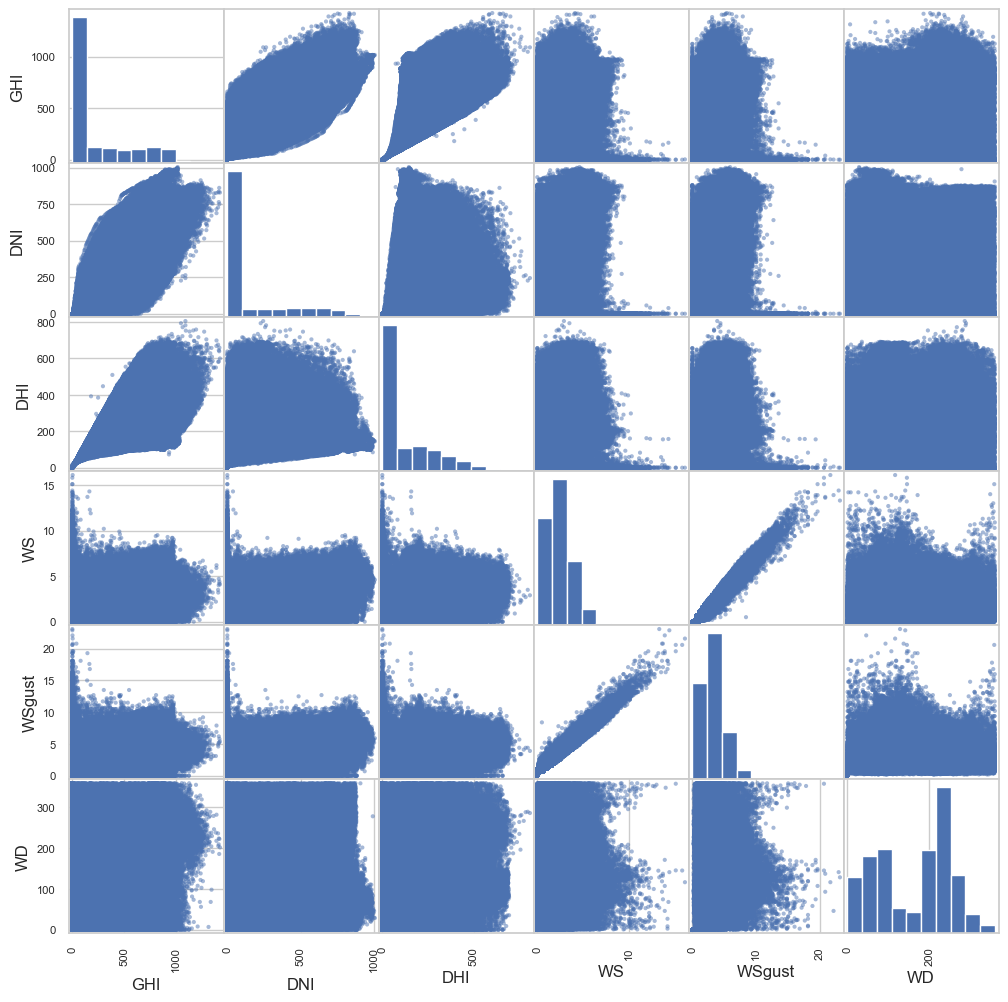

In [18]:
#Scatter Matrix: Investigate relationships between wind conditions and solar irradiance
pd.plotting.scatter_matrix(df[['GHI', 'DNI', 'DHI', 'WS', 'WSgust', 'WD']], figsize=(12, 12))
plt.show()


6. Wind Analysis
Use polar plots to identify trends and significant wind events.

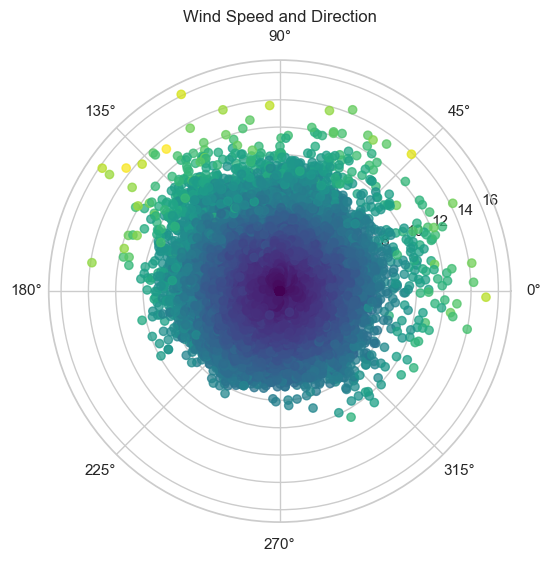

In [19]:
from matplotlib import pyplot as plt
import numpy as np

# Polar plot for wind analysis
plt.figure(figsize=(10, 6))
ax = plt.subplot(111, polar=True)
ax.scatter(df['WD'] * np.pi / 180, df['WS'], c=df['WSgust'], cmap='viridis', alpha=0.75)
plt.title('Wind Speed and Direction')
plt.show()


7. Temperature Analysis

Examine how relative humidity (RH) might influence temperature readings and solar radiation.

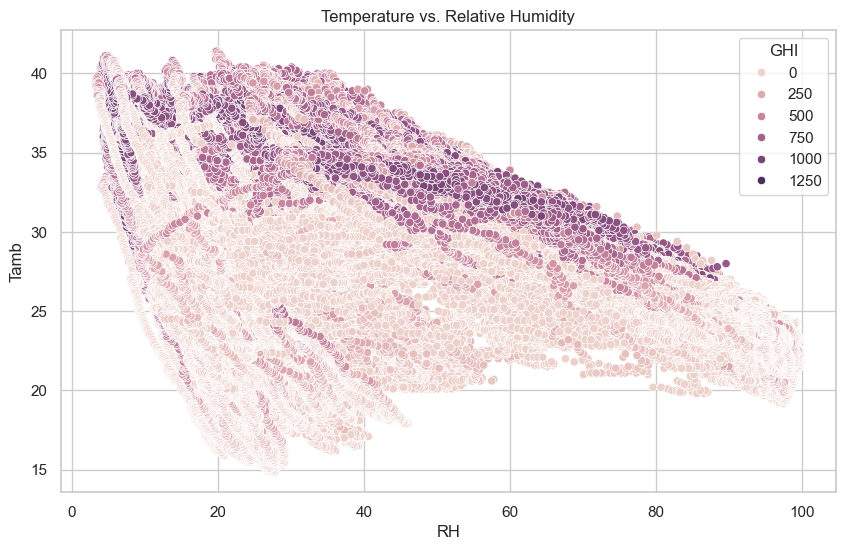

In [20]:
# Plot temperature vs. relative humidity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='RH', y='Tamb', hue='GHI')
plt.title('Temperature vs. Relative Humidity')
plt.show()


8. Histograms

Create histograms for variables like GHI, DNI, DHI, WS, and temperatures to visualize the frequency distribution.

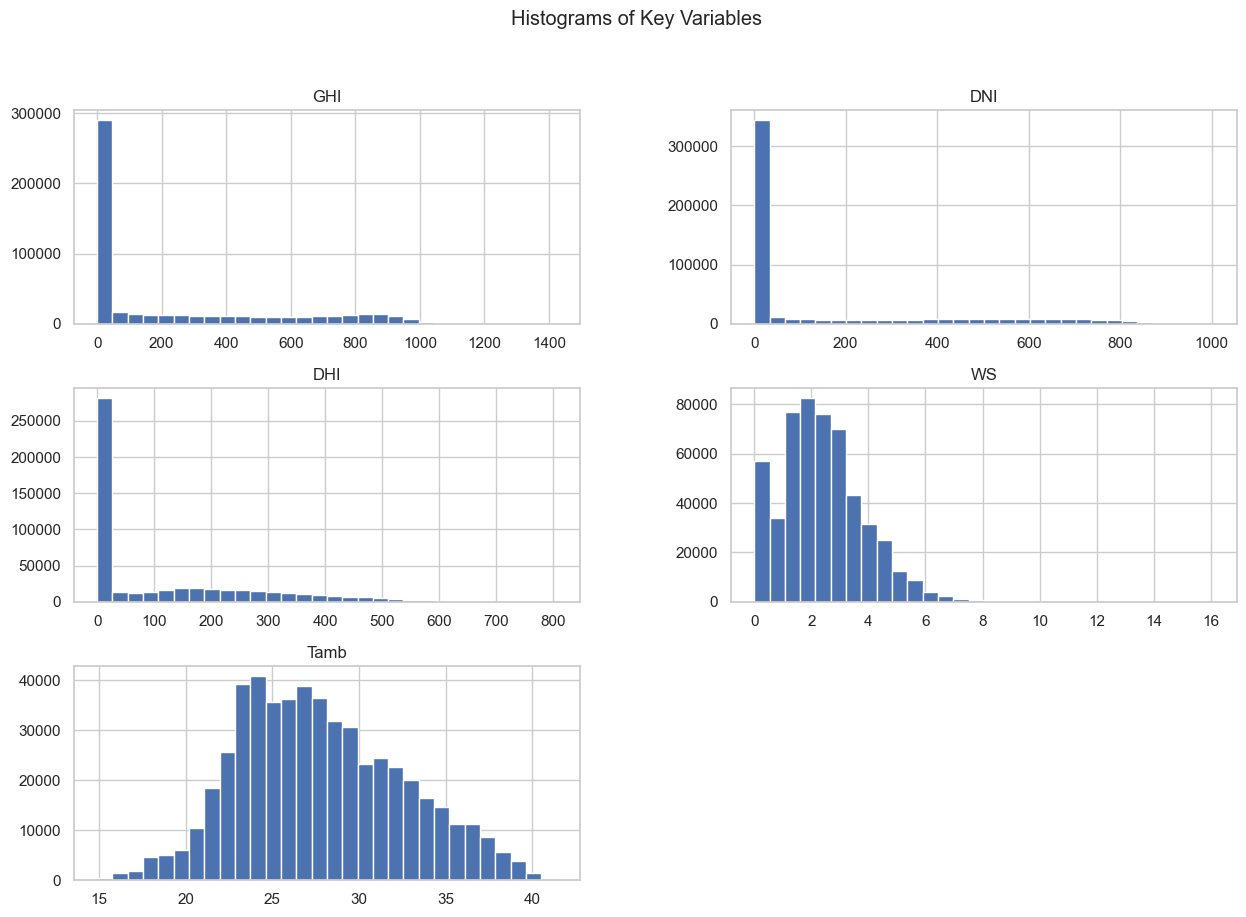

In [21]:
# Plot histograms
df[['GHI', 'DNI', 'DHI', 'WS', 'Tamb']].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Key Variables')
plt.show()


9. Z-Score Analysis

Calculate Z-scores to flag data points that are significantly different from the mean.

In [22]:
from scipy.stats import zscore

# Calculate Z-scores for GHI, DNI, DHI
df['GHI_zscore'] = zscore(df['GHI'])
df['DNI_zscore'] = zscore(df['DNI'])
df['DHI_zscore'] = zscore(df['DHI'])

# Flag significant outliers
ghi_outliers = df[(df['GHI_zscore'] > 3) | (df['GHI_zscore'] < -3)]
print("GHI Outliers:\n", ghi_outliers)


GHI Outliers:
                         GHI    DNI    DHI    ModA    ModB  Tamb    RH   WS  \
Timestamp                                                                    
2022-04-15 12:18:00  1223.0  615.1  597.3  1154.0  1123.0  35.4  45.1  4.0   
2022-04-15 12:19:00  1267.0  666.5  593.3  1194.0  1164.0  35.3  45.3  3.5   
2022-04-15 12:20:00  1243.0  652.7  578.6  1167.0  1137.0  35.4  45.1  5.6   
2022-04-15 12:24:00  1234.0  632.0  589.4  1156.0  1125.0  35.2  45.5  4.5   
2022-04-15 12:26:00  1263.0  653.3  602.0  1185.0  1154.0  35.3  45.8  4.2   
...                     ...    ...    ...     ...     ...   ...   ...  ...   
2022-10-14 10:51:00  1221.0  811.8  450.7  1255.3  1237.0  29.9  70.1  4.9   
2022-10-14 10:53:00  1285.0  862.8  460.8  1309.4  1290.0  30.1  67.8  5.1   
2022-10-14 10:54:00  1202.0  748.9  494.9  1242.3  1225.0  30.1  68.0  4.4   
2022-10-14 10:55:00  1267.0  790.9  514.5  1299.4  1280.0  30.1  68.6  4.0   
2022-10-14 10:57:00  1214.0  699.2  542.7  1244.3

10. Bubble Charts

Explore complex relationships between variables using bubble charts.

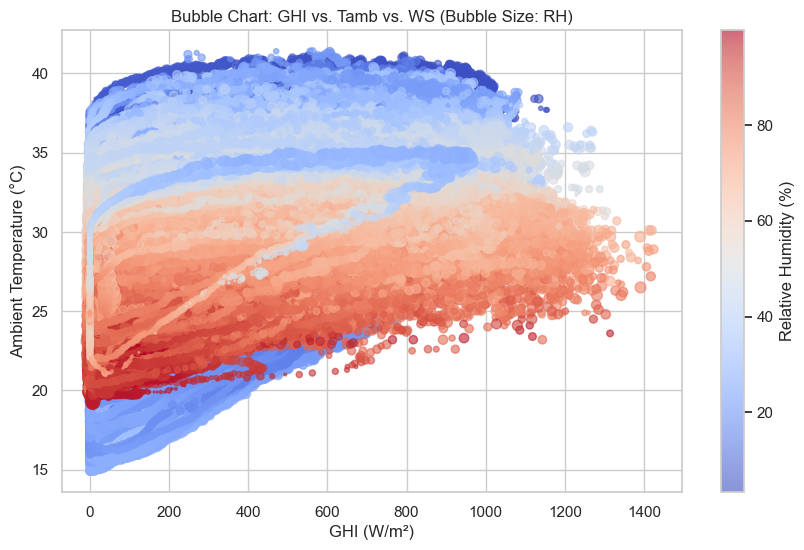

In [23]:
# Bubble chart for GHI vs. Tamb vs. WS with RH as bubble size
plt.figure(figsize=(10, 6))
plt.scatter(df['GHI'], df['Tamb'], s=df['WS']*10, c=df['RH'], cmap='coolwarm', alpha=0.6)
plt.xlabel('GHI (W/m²)')
plt.ylabel('Ambient Temperature (°C)')
plt.title('Bubble Chart: GHI vs. Tamb vs. WS (Bubble Size: RH)')
plt.colorbar(label='Relative Humidity (%)')
plt.show()


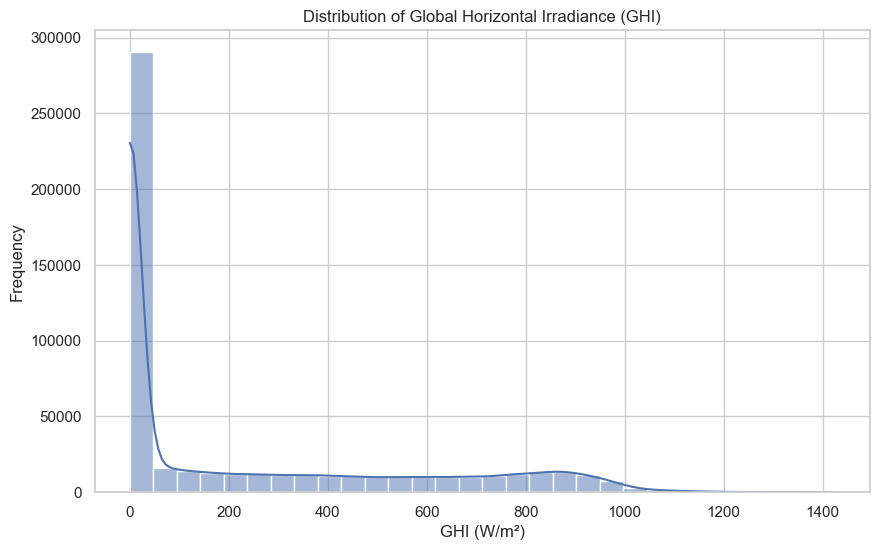

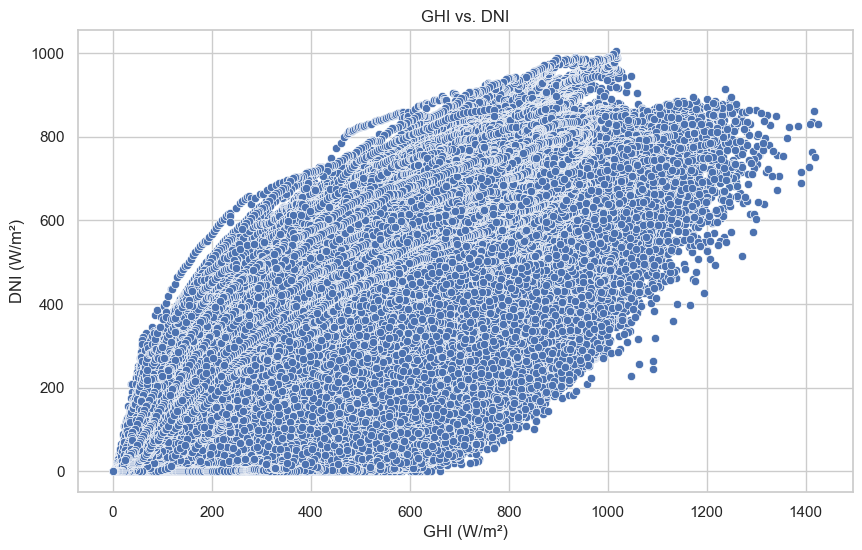

In [24]:
# Plotting the distribution of Global Horizontal Irradiance (GHI)
plt.figure(figsize=(10, 6))
sn.histplot(df['GHI'], bins=30, kde=True)
plt.title('Distribution of Global Horizontal Irradiance (GHI)')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Frequency')
plt.show()

# Plotting the relationship between GHI and DNI
plt.figure(figsize=(10, 6))
sn.scatterplot(x='GHI', y='DNI', data=df)
plt.title('GHI vs. DNI')
plt.xlabel('GHI (W/m²)')
plt.ylabel('DNI (W/m²)')
plt.show()